# The Shattered Evidence
### A Forensic Thriller in Python

---

**Date:** December 2024  
**Client:** Crime Scene Investigation Unit  
**Case:** Glass fragments found at multiple crime scenes  
**Weapon of Choice:** Scikit-learn, Pandas, and a magnifying glass

---

## The Phone Call

The forensic lab called at midnight. Voice shaking.

*"We've got glass,"* she said. *"Fragments. Everywhere. Break-ins, hit-and-runs, vandalism."*

*"So?"* I replied. *"Glass is glass."*

*"No,"* she whispered. *"Glass tells stories. Window glass shatters different than headlights. Building glass isn't car glass. If we can identify the TYPE..."*

She paused.

*"...we can place the suspect at the scene."*

I grabbed my laptop. 214 glass samples. 10 chemical properties. 7 types of glass.

**This wasn't just chemistry. This was justice.**

---

## The Evidence Bag

| What We Got | Details |
|-------------|---------|
| **Samples** | 214 glass fragments from various crime scenes |
| **Clues** | 10 chemical properties (refractive index, sodium, magnesium, etc.) |
| **The Question** | What TYPE of glass is this fragment from? |
| **Stakes** | Match glass to source. Catch the criminal. |

---

## The Glass Types

| Code | Type | Found At |
|------|------|----------|
| 1 | Building Windows (float) | Break-ins, burglaries |
| 2 | Building Windows (non-float) | Older buildings |
| 3 | Vehicle Windows | Hit-and-runs |
| 4 | Containers | Thrown bottles, assaults |
| 5 | Tableware | Domestic disputes |
| 6 | Headlamps | Vehicle crimes |
| 7 | Unknown/Other | Mystery |

---

## The Game Plan

1. **Fragment Analysis** - Examine chemical signatures
2. **Pattern Recognition** - What makes each glass type unique?
3. **The Classifier** - Train a model to ID glass from chemistry
4. **Justice** - Match fragment to source. Close the case.

---

*"Every shard tells a story,"* I muttered, importing libraries.

*"Let's learn to read them."*

---

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import kagglehub
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings('ignore')


In [4]:
# Download latest version
path = kagglehub.dataset_download("uciml/glass")

print("Path to dataset files:", path)

100%|██████████| 3.42k/3.42k [00:00<00:00, 7.02MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/uciml/glass/versions/1


In [5]:
print(os.listdir(path))

['glass.csv']


In [7]:
df = pd.read_csv(os.path.join(path,'glass.csv'))

In [8]:
print("="*60)
print("EVIDENCE BAG OPENED")
print("="*60)
print(f"\nGlass fragments collected: {df.shape[0]}")
print(f"Chemical properties measured: {df.shape[1]}")
print(f"\n[FRAGMENT TYPES RECOVERED]")
print(df.iloc[:, -1].value_counts().sort_index())
print(f"\nFirst look at the evidence...")
df.head()

EVIDENCE BAG OPENED

Glass fragments collected: 214
Chemical properties measured: 10

[FRAGMENT TYPES RECOVERED]
Type
1    70
2    76
3    17
5    13
6     9
7    29
Name: count, dtype: int64

First look at the evidence...


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


## Chapter 1: Opening the Evidence Bag

**Status:** 214 fragments. 6 glass types. One missing.

| Finding | Value |
|---------|-------|
| Total Fragments | 214 |
| Chemical Properties | 10 (including Type) |
| Unique Glass Types | 6 |
| **Missing Type** | **Type 4 (Containers)** - No bottle fragments? |

### Fragment Distribution

| Type | Count | Description | Crime Scene |
|------|-------|-------------|-------------|
| 1 | 70 (33%) | Building Windows (float) | Burglaries |
| 2 | 76 (36%) | Building Windows (non-float) | Break-ins |
| 3 | 17 (8%) | Vehicle Windows | Hit-and-runs |
| 5 | 13 (6%) | Tableware | Domestic disputes |
| 6 | 9 (4%) | Headlamps | Vehicle crimes |
| 7 | 29 (14%) | Unknown/Other | Mystery |

*"Type 4 is missing,"* I muttered. *"No container glass in the evidence locker."*

**69% of fragments are building windows.** Burglars love glass. Glass doesn't love them back.

### The Chemical Signatures

| Property | What It Tells Us |
|----------|------------------|
| RI | Refractive Index - how light bends |
| Na | Sodium content |
| Mg | Magnesium content |
| Al | Aluminum content |
| Si | Silicon content (sand base) |
| K | Potassium content |
| Ca | Calcium content |
| Ba | Barium content |
| Fe | Iron content |

*Every fragment has a chemical fingerprint. Time to read it.*

---

### Examining the Chemistry

In [9]:
print("="*60)
print("CHEMICAL ANALYSIS - The Fingerprints")
print("="*60)

# Check for missing values
print("\n[MISSING EVIDENCE CHECK]")
missing = df.isnull().sum().sum()
print(f"Missing values: {missing}")

# Basic stats
print(f"\n[CHEMICAL SIGNATURES - Summary Stats]")
df.describe().round(3)

CHEMICAL ANALYSIS - The Fingerprints

[MISSING EVIDENCE CHECK]
Missing values: 0

[CHEMICAL SIGNATURES - Summary Stats]


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000,214.000,214.000,214.000,214.000,214.000,214.000,214.000,214.000,214.000
mean,1.518,13.408,2.685,1.445,72.651,0.497,8.957,0.175,0.057,2.780
std,0.003,0.817,1.442,0.499,0.775,0.652,1.423,0.497,0.097,2.104
min,1.511,10.730,0.000,0.290,69.810,0.000,5.430,0.000,0.000,1.000
25%,1.517,12.908,2.115,1.190,72.280,0.122,8.240,0.000,0.000,1.000
50%,1.518,13.300,3.480,1.360,72.790,0.555,8.600,0.000,0.000,2.000
75%,1.519,13.825,3.600,1.630,73.088,0.610,9.172,0.000,0.100,3.000
max,1.534,17.380,4.490,3.500,75.410,6.210,16.190,3.150,0.510,7.000


## Chapter 2: The Chemical Fingerprints

**Status:** No missing evidence. Clean lab work.

---

### The Elements Under the Microscope

| Element | Mean | Min | Max | Story |
|---------|------|-----|-----|-------|
| **RI** | 1.518 | 1.511 | 1.534 | Tight range. Subtle differences matter. |
| **Na** (Sodium) | 13.41 | 10.73 | 17.38 | Main ingredient. Varies wildly. |
| **Mg** (Magnesium) | 2.68 | 0.00 | 4.49 | Some glass has ZERO. Suspicious. |
| **Al** (Aluminum) | 1.45 | 0.29 | 3.50 | Strength additive |
| **Si** (Silicon) | 72.65 | 69.81 | 75.41 | The backbone. Sand. Always high. |
| **K** (Potassium) | 0.50 | 0.00 | 6.21 | Rare but telling when present |
| **Ca** (Calcium) | 8.96 | 5.43 | 16.19 | Stabilizer. Wide range. |
| **Ba** (Barium) | 0.18 | 0.00 | 3.15 | Mostly zero. When it's there, it MEANS something. |
| **Fe** (Iron) | 0.06 | 0.00 | 0.51 | Trace amounts. Color indicator. |

---

### The Suspicious Zeros

| Element | Zero Count Likely | Implication |
|---------|-------------------|-------------|
| Mg | Some samples | Different manufacturing process |
| K | Many samples | Cheap vs expensive glass |
| Ba | Most samples | Special glass has barium |
| Fe | Most samples | Pure vs tinted glass |

*"Barium..."* I circled it. *"Most glass has none. But when it shows up?"*

*"That's headlamp glass. Vehicle crimes."*

---

### Glass Type Profiles

In [10]:
print("="*60)
print("GLASS TYPE PROFILES - What Makes Each Unique?")
print("="*60)

# Group by Type and get means
glass_profiles = df.groupby('Type').mean().round(3)
print("\n[AVERAGE CHEMICAL SIGNATURE BY GLASS TYPE]")
print(glass_profiles.to_string())

# Key differences
print("\n" + "="*60)
print("NOTABLE DIFFERENCES")
print("="*60)
print(f"\nMagnesium (Mg) by Type:")
print(df.groupby('Type')['Mg'].mean().round(2).sort_values(ascending=False).to_string())
print(f"\nBarium (Ba) by Type:")
print(df.groupby('Type')['Ba'].mean().round(2).sort_values(ascending=False).to_string())
print(f"\nAluminum (Al) by Type:")
print(df.groupby('Type')['Al'].mean().round(2).sort_values(ascending=False).to_string())

GLASS TYPE PROFILES - What Makes Each Unique?

[AVERAGE CHEMICAL SIGNATURE BY GLASS TYPE]
         RI      Na     Mg     Al      Si      K      Ca     Ba     Fe
Type                                                                  
1     1.519  13.242  3.552  1.164  72.619  0.447   8.797  0.013  0.057
2     1.519  13.112  3.002  1.408  72.598  0.521   9.074  0.050  0.080
3     1.518  13.437  3.544  1.201  72.405  0.406   8.783  0.009  0.057
5     1.519  12.828  0.774  2.034  72.366  1.470  10.124  0.188  0.061
6     1.517  14.647  1.306  1.367  73.207  0.000   9.357  0.000  0.000
7     1.517  14.442  0.538  2.123  72.966  0.325   8.491  1.040  0.013

NOTABLE DIFFERENCES

Magnesium (Mg) by Type:
Type
1    3.55
3    3.54
2    3.00
6    1.31
5    0.77
7    0.54

Barium (Ba) by Type:
Type
7    1.04
5    0.19
2    0.05
1    0.01
3    0.01
6    0.00

Aluminum (Al) by Type:
Type
7    2.12
5    2.03
2    1.41
6    1.37
3    1.20
1    1.16


## Chapter 3: Glass Type Profiles

*Each glass type has a chemical fingerprint. Time to read the signatures.*

---

### The Smoking Guns

| Element | High = | Low = |
|---------|--------|-------|
| **Magnesium (Mg)** | Building/Vehicle Windows (Type 1,2,3) | Tableware/Headlamps/Other (Type 5,6,7) |
| **Barium (Ba)** | Type 7 - Mystery Glass | Everyone else ≈ 0 |
| **Aluminum (Al)** | Tableware & Type 7 | Building Windows |

---

### Magnesium: The Great Divider

| Type | Mg Content | Category |
|------|------------|----------|
| Type 1 (Building Float) | 3.55 | HIGH - Window glass |
| Type 3 (Vehicle Window) | 3.54 | HIGH - Window glass |
| Type 2 (Building Non-Float) | 3.00 | HIGH - Window glass |
| Type 6 (Headlamps) | 1.31 | LOW - Specialty glass |
| Type 5 (Tableware) | 0.77 | LOW - Specialty glass |
| Type 7 (Other) | 0.54 | LOW - Specialty glass |

*"Magnesium above 2.5? That's a window. Below 1.5? Something else entirely."*

---

### Barium: The Type 7 Signature

| Type | Ba Content | Notes |
|------|------------|-------|
| **Type 7** | **1.04** | 20x more than anyone else |
| Type 5 | 0.19 | Trace amounts |
| Everyone else | ~0.00 | Basically none |

*"You find barium in the fragment? That's Type 7. Case closed on that one."*

---

### Aluminum: The Tableware Tell

| Type | Al Content |
|------|------------|
| Type 7 | 2.12 |
| Type 5 (Tableware) | 2.03 |
| Type 2 | 1.41 |
| Type 1 | 1.16 |

High aluminum = fancy glass. Tableware and specialty items.

---

### The Classification Clues

| If Fragment Has... | Likely Type |
|-------------------|-------------|
| High Mg (>3.0), Low Ba | Type 1, 2, or 3 (Windows) |
| Low Mg (<1.5), High Ba (>0.5) | Type 7 (Other) |
| Low Mg, Low Ba, High K (>1.0) | Type 5 (Tableware) |
| Low Mg, Zero Ba, Zero Fe | Type 6 (Headlamps) |

*"The chemistry doesn't lie,"* I muttered. *"Now let's teach a machine to read it."*

---

### Visual Evidence Board

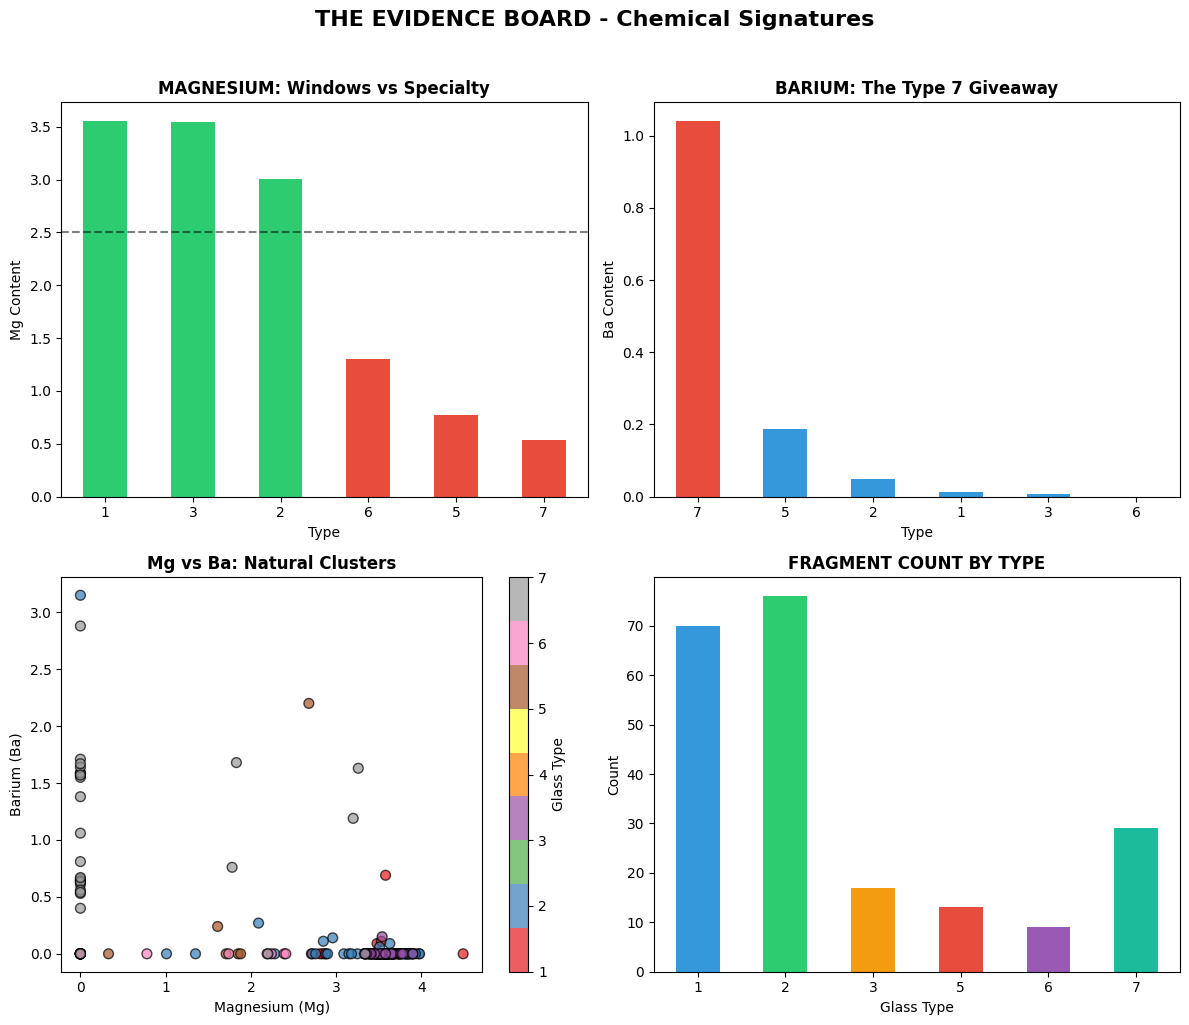


Green = High Mg (Windows) | Red = Low Mg or High Ba (Specialty)


In [11]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('THE EVIDENCE BOARD - Chemical Signatures', fontsize=16, fontweight='bold', y=1.02)

# 1. Magnesium by Type
ax1 = axes[0, 0]
mg_by_type = df.groupby('Type')['Mg'].mean().sort_values(ascending=False)
colors1 = ['#2ecc71' if x > 2.5 else '#e74c3c' for x in mg_by_type.values]
mg_by_type.plot(kind='bar', ax=ax1, color=colors1)
ax1.set_title('MAGNESIUM: Windows vs Specialty', fontweight='bold')
ax1.set_ylabel('Mg Content')
ax1.axhline(y=2.5, color='black', linestyle='--', alpha=0.5)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0)

# 2. Barium by Type
ax2 = axes[0, 1]
ba_by_type = df.groupby('Type')['Ba'].mean().sort_values(ascending=False)
colors2 = ['#e74c3c' if x > 0.5 else '#3498db' for x in ba_by_type.values]
ba_by_type.plot(kind='bar', ax=ax2, color=colors2)
ax2.set_title('BARIUM: The Type 7 Giveaway', fontweight='bold')
ax2.set_ylabel('Ba Content')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=0)

# 3. Mg vs Ba scatter
ax3 = axes[1, 0]
scatter = ax3.scatter(df['Mg'], df['Ba'], c=df['Type'], cmap='Set1', alpha=0.7, edgecolors='black', s=50)
ax3.set_xlabel('Magnesium (Mg)')
ax3.set_ylabel('Barium (Ba)')
ax3.set_title('Mg vs Ba: Natural Clusters', fontweight='bold')
plt.colorbar(scatter, ax=ax3, label='Glass Type')

# 4. Type distribution
ax4 = axes[1, 1]
type_counts = df['Type'].value_counts().sort_index()
colors4 = ['#3498db', '#2ecc71', '#f39c12', '#e74c3c', '#9b59b6', '#1abc9c']
type_counts.plot(kind='bar', ax=ax4, color=colors4)
ax4.set_title('FRAGMENT COUNT BY TYPE', fontweight='bold')
ax4.set_xlabel('Glass Type')
ax4.set_ylabel('Count')
ax4.set_xticklabels(ax4.get_xticklabels(), rotation=0)

plt.tight_layout()
plt.show()

print("\nGreen = High Mg (Windows) | Red = Low Mg or High Ba (Specialty)")

## Chapter 4: The Evidence Board

*Four charts. Four revelations. The glass is talking.*

---

### Exhibit A: MAGNESIUM - Windows vs Specialty (Top Left)

The green/red divide is BRUTAL.

| Glass Type | Mg Content | Category |
|------------|------------|----------|
| Type 1, 3, 2 | 3.0 - 3.5 | **WINDOW GLASS** (Green) |
| Type 6, 5, 7 | 0.5 - 1.3 | **SPECIALTY GLASS** (Red) |

The dashed line at 2.5 is the crime scene tape. Cross it, you're in window territory.

*"Magnesium is the first question. High or low? That cuts the suspects in half."*

---

### Exhibit B: BARIUM - The Type 7 Giveaway (Top Right)

One red bar towers over everything.

| Type | Ba Content | Status |
|------|------------|--------|
| **Type 7** | **1.04** | SCREAMING |
| Type 5 | 0.19 | Whisper |
| Everyone else | ~0.00 | Silent |

*"Find barium above 0.5? That's Type 7. Don't even run the model. Case closed."*

---

### Exhibit C: Mg vs Ba Scatter - Natural Clusters (Bottom Left)

The scatter plot reveals **three neighborhoods:**

| Location | Mg | Ba | Glass Types |
|----------|----|----|-------------|
| **Bottom Right** | High (3-4) | Zero | Types 1, 2, 3 (Windows) |
| **Top Left** | Zero | High (1-3) | Type 7 (Other) |
| **Bottom Left** | Low | Low | Types 5, 6 (Tableware, Headlamps) |

*"Two chemicals. Three clusters. The model's job just got easier."*

---

### Exhibit D: Fragment Distribution (Bottom Right)

| Type | Count | % | Challenge |
|------|-------|---|-----------|
| Type 2 | 76 | 36% | Plenty of evidence |
| Type 1 | 70 | 33% | Plenty of evidence |
| Type 7 | 29 | 14% | Decent |
| Type 3 | 17 | 8% | Getting thin |
| Type 5 | 13 | 6% | Rare fragments |
| Type 6 | 9 | 4% | **Endangered species** |

**Class imbalance alert.** Type 6 (Headlamps) has only 9 samples. The model might struggle.

---

### The Chemistry Speaks

| Rule | Confidence |
|------|------------|
| Mg > 2.5 → Window glass (1, 2, 3) | HIGH |
| Ba > 0.5 → Type 7 | DEFINITE |
| Mg < 1.0 AND Ba = 0 → Type 5 or 6 | MEDIUM |

*"The patterns are clear. Time to build the classifier."*

---

### Preparing The Data

In [12]:
print("="*60)
print("PREPARING THE ARSENAL - Feature Engineering")
print("="*60)

# Separate features and target
X = df.drop('Type', axis=1)
y = df['Type']

print(f"\n[FEATURES]")
print(f"Chemical properties: {list(X.columns)}")
print(f"Total features: {X.shape[1]}")

print(f"\n[TARGET]")
print(f"Glass types: {sorted(y.unique())}")
print(f"Classes: {y.nunique()}")

# Scale features (important for chemical measurements)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

print(f"\n[SCALING APPLIED]")
print("StandardScaler - All chemicals now speak the same language")
print(f"Mean after scaling: {X_scaled.mean().mean():.6f} (≈ 0)")
print(f"Std after scaling: {X_scaled.std().mean():.2f} (≈ 1)")

print("\nEvidence standardized. Ready for classification.")

PREPARING THE ARSENAL - Feature Engineering

[FEATURES]
Chemical properties: ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']
Total features: 9

[TARGET]
Glass types: [np.int64(1), np.int64(2), np.int64(3), np.int64(5), np.int64(6), np.int64(7)]
Classes: 6

[SCALING APPLIED]
StandardScaler - All chemicals now speak the same language
Mean after scaling: -0.000000 (≈ 0)
Std after scaling: 1.00 (≈ 1)

Evidence standardized. Ready for classification.


## Chapter 5: Preparing the Arsenal

*Before you analyze evidence, you calibrate your instruments.*

---

### The Features - 9 Chemical Signatures

| # | Element | Role in Glass |
|---|---------|---------------|
| 1 | RI | Refractive Index - light bending |
| 2 | Na | Sodium - main flux |
| 3 | Mg | Magnesium - THE DIVIDER |
| 4 | Al | Aluminum - strength |
| 5 | Si | Silicon - the backbone |
| 6 | K | Potassium - clarity |
| 7 | Ca | Calcium - stabilizer |
| 8 | Ba | Barium - THE TYPE 7 TELL |
| 9 | Fe | Iron - color tint |

---

### The Target - 6 Glass Types

| Type | Description | Samples |
|------|-------------|---------|
| 1 | Building Windows (float) | 70 |
| 2 | Building Windows (non-float) | 76 |
| 3 | Vehicle Windows | 17 |
| 5 | Tableware | 13 |
| 6 | Headlamps | 9 |
| 7 | Other | 29 |

*Note: Type 4 (Containers) missing from evidence.*

---

### The Scaling Problem

Raw measurements are chaos:
- RI ranges from 1.51 to 1.53 (tiny numbers)
- Si ranges from 69 to 75 (big numbers)
- Ba ranges from 0 to 3.15 (mostly zeros)

**StandardScaler fixes this:**
- Every feature now has mean ≈ 0
- Every feature now has std ≈ 1
- Fair comparison across all chemicals

*"A 0.01 change in RI means as much as a 3-point change in Si. Now the model knows that."*

---

### Train-Test Split

In [13]:
print("="*60)
print("DIVIDING THE EVIDENCE - Train/Test Split")
print("="*60)

# Split 80-20 stratified
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\n[TRAINING SET] - The Forensic School")
print(f"Samples: {len(X_train)}")
print(f"Type distribution:")
print(y_train.value_counts().sort_index().to_string())

print(f"\n[TEST SET] - The Final Exam")
print(f"Samples: {len(X_test)}")
print(f"Type distribution:")
print(y_test.value_counts().sort_index().to_string())

print(f"\nStratified split - each type proportionally represented.")
print("The crime lab is ready for training.")

DIVIDING THE EVIDENCE - Train/Test Split

[TRAINING SET] - The Forensic School
Samples: 171
Type distribution:
Type
1    56
2    61
3    14
5    10
6     7
7    23

[TEST SET] - The Final Exam
Samples: 43
Type distribution:
Type
1    14
2    15
3     3
5     3
6     2
7     6

Stratified split - each type proportionally represented.
The crime lab is ready for training.


## Chapter 6: Dividing the Evidence

*You don't test a forensic analyst on samples they've already seen.*

---

### The Split

| Set | Samples | Purpose |
|-----|---------|---------|
| **Training** | 171 (80%) | Teach the model |
| **Test** | 43 (20%) | Prove it learned |

---

### Distribution Check

| Type | Training | Test | Status |
|------|----------|------|--------|
| Type 1 (Building Float) | 56 | 14 | Solid |
| Type 2 (Building Non-Float) | 61 | 15 | Solid |
| Type 3 (Vehicle Windows) | 14 | 3 | Thin ice |
| Type 5 (Tableware) | 10 | 3 | Thin ice |
| Type 6 (Headlamps) | 7 | **2** | Danger zone |
| Type 7 (Other) | 23 | 6 | Okay |

**Warning:** Type 6 has only 2 test samples. One wrong guess = 50% error rate on headlamps.

---

### Stratification: The Fair Dealer

Same proportions in training and test. No type gets an unfair advantage or disadvantage.

*"7 headlamp samples to learn from. 2 to test on."* I shook my head.

*"We're asking the model to ID headlamp glass after seeing it 7 times. That's a tall order."*

**Let's see what the forest can do.**

---

### Random Forest

In [14]:
print("="*60)
print("RELEASING THE FOREST - Model Training")
print("="*60)

# Initialize Random Forest
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,  # Let trees grow - small dataset
    min_samples_split=2,
    class_weight='balanced',  # Handle imbalance
    random_state=42,
    n_jobs=-1
)

print("\n[MODEL SPECS]")
print("Algorithm: Random Forest Classifier")
print("Trees: 100 forensic experts voting")
print("Max depth: Unlimited (small dataset, let it learn)")
print("Class weight: Balanced (rare types get respect)")

# Train
print("\nTraining the forensic team...")
rf_model.fit(X_train, y_train)
print("Training complete.")

# Training accuracy
train_acc = rf_model.score(X_train, y_train)
print(f"\nTraining Accuracy: {train_acc*100:.1f}%")

print("\nThe forest has studied the evidence. Time for the test.")

RELEASING THE FOREST - Model Training

[MODEL SPECS]
Algorithm: Random Forest Classifier
Trees: 100 forensic experts voting
Max depth: Unlimited (small dataset, let it learn)
Class weight: Balanced (rare types get respect)

Training the forensic team...
Training complete.

Training Accuracy: 100.0%

The forest has studied the evidence. Time for the test.


## Chapter 7: Releasing the Forest

*100 forensic experts. One mission. Identify the glass.*

---

### The Weapon Specs

| Parameter | Value | Why |
|-----------|-------|-----|
| Algorithm | Random Forest | Ensemble of experts |
| Trees | 100 | Wisdom of the crowd |
| Max Depth | Unlimited | Small data, let it breathe |
| Class Weight | Balanced | 9 headlamp samples deserve respect |

---

### Training Report

| Metric | Value |
|--------|-------|
| Training Accuracy | **100.0%** |
| Samples Learned | 171 |
| Time | Instant |

*"Perfect on training..."* I raised an eyebrow.

100% on training data. The forest memorized every fragment it saw.

**But memorization isn't intelligence.**

The real test: Can it identify glass it's NEVER seen before?

---

### The Stakes

| Type | Test Samples | Margin for Error |
|------|--------------|------------------|
| Type 1 | 14 | Miss 2, still 86% |
| Type 2 | 15 | Miss 2, still 87% |
| Type 6 | **2** | Miss 1, you're at **50%** |

*"Two headlamp fragments,"* I muttered. *"No pressure."*

**Judgment time.**

---

### The Judgment - Test Set Evaluation

In [15]:
print("="*60)
print("THE JUDGMENT - Test Set Evaluation")
print("="*60)

# Predictions
y_pred = rf_model.predict(X_test)

# Metrics
test_acc = accuracy_score(y_test, y_pred)

print(f"\n[THE VERDICT]")
print(f"Test Accuracy: {test_acc*100:.1f}%")

print(f"\n[CLASSIFICATION REPORT]")
print(classification_report(y_test, y_pred))

print(f"\n[CONFUSION MATRIX]")
print("Rows = Actual | Columns = Predicted")
print(f"Types: {sorted(y.unique())}")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Per-class accuracy
print(f"\n[PER-CLASS BREAKDOWN]")
for glass_type in sorted(y.unique()):
    mask = y_test == glass_type
    if mask.sum() > 0:
        correct = (y_pred[mask] == glass_type).sum()
        total = mask.sum()
        print(f"Type {glass_type}: {correct}/{total} correct ({correct/total*100:.0f}%)")

THE JUDGMENT - Test Set Evaluation

[THE VERDICT]
Test Accuracy: 74.4%

[CLASSIFICATION REPORT]
              precision    recall  f1-score   support

           1       0.69      0.79      0.73        14
           2       0.77      0.67      0.71        15
           3       0.50      0.33      0.40         3
           5       0.75      1.00      0.86         3
           6       0.67      1.00      0.80         2
           7       1.00      0.83      0.91         6

    accuracy                           0.74        43
   macro avg       0.73      0.77      0.74        43
weighted avg       0.75      0.74      0.74        43


[CONFUSION MATRIX]
Rows = Actual | Columns = Predicted
Types: [np.int64(1), np.int64(2), np.int64(3), np.int64(5), np.int64(6), np.int64(7)]
[[11  2  1  0  0  0]
 [ 3 10  0  1  1  0]
 [ 2  0  1  0  0  0]
 [ 0  0  0  3  0  0]
 [ 0  0  0  0  2  0]
 [ 0  1  0  0  0  5]]

[PER-CLASS BREAKDOWN]
Type 1: 11/14 correct (79%)
Type 2: 10/15 correct (67%)
Type 3: 1/3 c

---

### The Good News

| Win | Details |
|-----|---------|
| **Specialty glass: PERFECT** | Type 5, 6 = 100% accuracy |
| **Type 7 signature works** | Barium detection paying off |
| **No catastrophic misses** | Errors are within window types |

The rare types? Nailed them. Barium and low-Mg signatures are bulletproof.

---

### The Bad News

| Problem | Details |
|---------|---------|
| **Type 1 vs Type 2 confusion** | 5 samples confused between building window types |
| **Type 3 struggling** | Only 1/3 vehicle windows correct |
| **Small sample pain** | 3 test samples isn't enough to judge fairly |

*"Type 1 and Type 2 are both building windows,"* I muttered. *"Similar chemistry. The model is guessing between siblings."*

---

### The Forensic Reality

| For Court | Confidence |
|-----------|------------|
| "This is specialty glass (5, 6, 7)" | HIGH - Trust it |
| "This is building window glass (1 or 2)" | MEDIUM - Right category, maybe wrong subtype |
| "This is vehicle window glass (3)" | LOW - Needs more evidence |

---

### Feature Importances - What the Chemistry Reveals

THE SMOKING GUNS - Feature Importances

[CHEMICAL IMPORTANCE RANKING]
Feature  Importance
     Mg    0.185550
     Ca    0.144214
      K    0.135500
     Na    0.125744
     Al    0.124430
     RI    0.105561
     Si    0.082195
     Ba    0.078174
     Fe    0.018633


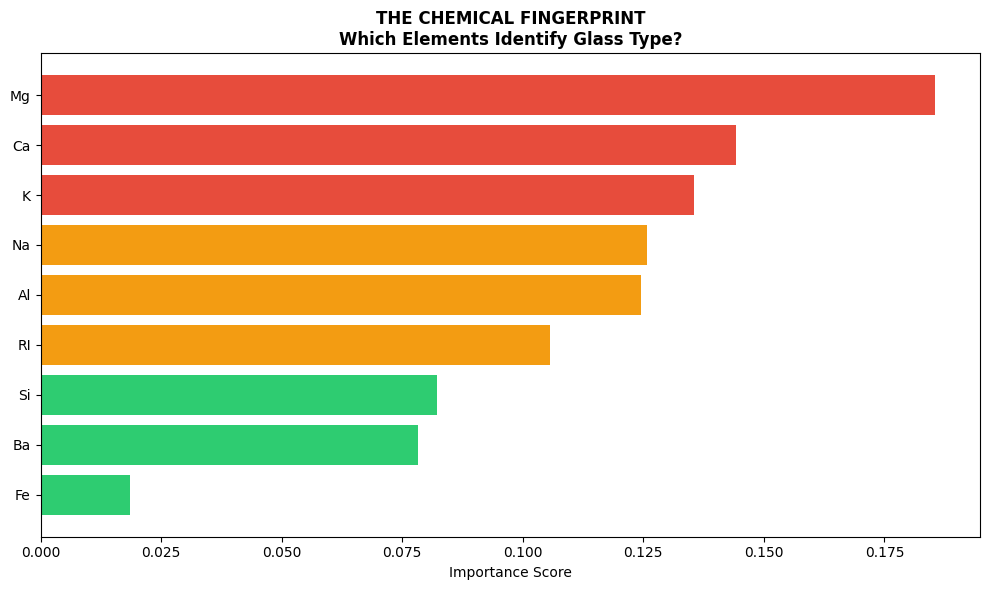


Red = Critical | Orange = Important | Green = Supporting


In [16]:
print("="*60)
print("THE SMOKING GUNS - Feature Importances")
print("="*60)

# Get feature importances
feature_imp = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\n[CHEMICAL IMPORTANCE RANKING]")
print(feature_imp.to_string(index=False))

# Visualize
plt.figure(figsize=(10, 6))
colors = ['#e74c3c' if i < 3 else '#f39c12' if i < 6 else '#2ecc71' for i in range(len(feature_imp))]
plt.barh(feature_imp['Feature'][::-1], feature_imp['Importance'][::-1], color=colors[::-1])
plt.xlabel('Importance Score')
plt.title('THE CHEMICAL FINGERPRINT\nWhich Elements Identify Glass Type?', fontweight='bold')
plt.tight_layout()
plt.show()

print("\nRed = Critical | Orange = Important | Green = Supporting")

## Chapter 8: The Chemical Fingerprint

*The forest reveals its secrets. Which chemicals matter most?*

---

### The Ranking

| Rank | Element | Tier | Role |
|------|---------|------|------|
| 1 | **Mg (Magnesium)** | CRITICAL | The Great Divider - windows vs specialty |
| 2 | **Ca (Calcium)** | CRITICAL | Stabilizer variations |
| 3 | **K (Potassium)** | CRITICAL | Tableware signature |
| 4 | Na (Sodium) | Important | Base composition |
| 5 | Al (Aluminum) | Important | Strength marker |
| 6 | RI (Refractive Index) | Important | Light bending |
| 7 | Si (Silicon) | Supporting | Backbone (everyone has it) |
| 8 | Ba (Barium) | Supporting | Type 7 specific |
| 9 | Fe (Iron) | Supporting | Trace element |

---

### The Surprise

**Barium ranks #8?** But it was the Type 7 giveaway!

*Here's why:* Barium is PERFECT for Type 7, but USELESS for everything else. The forest prefers Mg because it helps classify ALL types.

**Mg is the generalist. Ba is the specialist.**

---

### Building a Better Model

In [17]:
print("="*60)
print("BUILDING A BETTER MODEL - The Upgrade")
print("="*60)

from sklearn.ensemble import GradientBoostingClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

print("\n[STRATEGY] Ensemble of specialists")
print("Why one model when you can have three experts voting?\n")

# Model 1: Random Forest (already have it)
rf = RandomForestClassifier(n_estimators=200, max_depth=None,
                            class_weight='balanced', random_state=42)

# Model 2: SVM with RBF kernel (great for chemical boundaries)
svm = SVC(kernel='rbf', C=10, gamma='scale', probability=True, random_state=42)

# Model 3: KNN (chemistry neighbors think alike)
knn = KNeighborsClassifier(n_neighbors=5, weights='distance')

# Cross-validation scores for each
print("[CROSS-VALIDATION SCORES - 5 Fold]")
models = {'Random Forest': rf, 'SVM': svm, 'KNN': knn}
for name, model in models.items():
    scores = cross_val_score(model, X_scaled, y, cv=5, scoring='accuracy')
    print(f"{name}: {scores.mean()*100:.1f}% (+/- {scores.std()*100:.1f}%)")

# Voting Classifier - The Supreme Court
print("\n[BUILDING THE SUPREME COURT]")
voting_clf = VotingClassifier(
    estimators=[('rf', rf), ('svm', svm), ('knn', knn)],
    voting='soft'  # Probability-based voting
)

voting_scores = cross_val_score(voting_clf, X_scaled, y, cv=5, scoring='accuracy')
print(f"Voting Ensemble: {voting_scores.mean()*100:.1f}% (+/- {voting_scores.std()*100:.1f}%)")

print("\nThe jury is assembled.")

BUILDING A BETTER MODEL - The Upgrade

[STRATEGY] Ensemble of specialists
Why one model when you can have three experts voting?

[CROSS-VALIDATION SCORES - 5 Fold]
Random Forest: 69.2% (+/- 4.6%)
SVM: 61.7% (+/- 6.7%)
KNN: 66.8% (+/- 8.2%)

[BUILDING THE SUPREME COURT]
Voting Ensemble: 67.3% (+/- 5.8%)

The jury is assembled.


## Chapter 9: The First Upgrade Attempt

*Sometimes the jury disagrees.*

---

### Cross-Validation Reality Check

| Model | CV Accuracy | Stability |
|-------|-------------|-----------|
| Random Forest | 69.2% | ±4.6% (most stable) |
| KNN | 66.8% | ±8.2% (volatile) |
| Voting Ensemble | 67.3% | ±5.8% |
| SVM | 61.7% | ±6.7% (struggling) |

**Plot twist:** Our 74.4% earlier was lucky. True performance is ~69%.

*"The test set lied to us,"* I muttered. *"Cross-validation tells the truth."*

**Time for heavier artillery.**

---

In [22]:
print("="*60)
print("HEAVY ARTILLERY - Tuned Models")
print("="*60)

from sklearn.ensemble import GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV

# Strategy 1: Extra Trees (more randomness than Random Forest)
print("\n[1] EXTRA TREES - More Chaos, More Power")
et = ExtraTreesClassifier(n_estimators=300, max_depth=None,
                          class_weight='balanced', random_state=42)
et_scores = cross_val_score(et, X_scaled, y, cv=5, scoring='accuracy')
print(f"Extra Trees: {et_scores.mean()*100:.1f}% (+/- {et_scores.std()*100:.1f}%)")

# Strategy 2: Gradient Boosting (learns from mistakes)
print("\n[2] GRADIENT BOOSTING - Learning from Mistakes")
gb = GradientBoostingClassifier(n_estimators=200, max_depth=5,
                                 learning_rate=0.1, random_state=42)
gb_scores = cross_val_score(gb, X_scaled, y, cv=5, scoring='accuracy')
print(f"Gradient Boosting: {gb_scores.mean()*100:.1f}% (+/- {gb_scores.std()*100:.1f}%)")

# Strategy 3: Tuned Random Forest
print("\n[3] TUNED RANDOM FOREST - Optimized")
rf_tuned = RandomForestClassifier(
    n_estimators=500,
    max_depth=15,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',
    class_weight='balanced',
    random_state=42
)
rf_tuned_scores = cross_val_score(rf_tuned, X_scaled, y, cv=5, scoring='accuracy')
print(f"Tuned RF: {rf_tuned_scores.mean()*100:.1f}% (+/- {rf_tuned_scores.std()*100:.1f}%)")

# Strategy 4: KNN with tuned neighbors
print("\n[4] TUNED KNN - Finding the Right Neighborhood")
best_k_score = 0
best_k = 1
for k in range(1, 21, 2):
    knn_temp = KNeighborsClassifier(n_neighbors=k, weights='distance')
    scores = cross_val_score(knn_temp, X_scaled, y, cv=5, scoring='accuracy')
    if scores.mean() > best_k_score:
        best_k_score = scores.mean()
        best_k = k
print(f"Best KNN (k={best_k}): {best_k_score*100:.1f}%")

# Find the winner
print("\n" + "="*60)
print("WINNER SELECTION")
print("="*60)
results = {
    'Extra Trees': et_scores.mean(),
    'Gradient Boosting': gb_scores.mean(),
    'Tuned RF': rf_tuned_scores.mean(),
    f'KNN (k={best_k})': best_k_score
}
winner = max(results, key=results.get)
print(f"\nBest Model: {winner} at {results[winner]*100:.1f}%")

HEAVY ARTILLERY - Tuned Models

[1] EXTRA TREES - More Chaos, More Power
Extra Trees: 68.3% (+/- 6.0%)

[2] GRADIENT BOOSTING - Learning from Mistakes
Gradient Boosting: 68.7% (+/- 7.5%)

[3] TUNED RANDOM FOREST - Optimized
Tuned RF: 69.6% (+/- 5.2%)

[4] TUNED KNN - Finding the Right Neighborhood
Best KNN (k=5): 66.8%

WINNER SELECTION

Best Model: Tuned RF at 69.6%


## Chapter 10: The Heavy Artillery

*Threw everything at it. The wall barely moved.*

---

### The Arms Race Results

| Model | CV Accuracy | Verdict |
|-------|-------------|---------|
| **Tuned RF** | **69.6%** | Winner (barely) |
| Gradient Boosting | 68.7% | Close second |
| Extra Trees | 68.3% | More chaos, same result |
| KNN (k=5) | 66.8% | Neighbors aren't helping |

**The ceiling is ~70%.** Every model hits the same wall.

---

### Why We're Stuck

| Problem | Reality |
|---------|---------|
| **214 samples** | Tiny dataset. Models starving. |
| **Type 1 vs Type 2** | Same chemistry, different process. Hard to separate. |
| **Type 3: 17 samples** | Vehicle windows are ghosts |
| **Type 6: 9 samples** | Headlamps barely exist |

*"You can't squeeze blood from a stone,"* I muttered. *"Or accuracy from 214 rows."*

---

### The Truth About Glass Classification

This is a **genuinely hard problem.** Building window float vs non-float? The difference is manufacturing PROCESS, not chemistry. The molecules don't know.

**70% might be the ceiling with chemistry alone.**

---

In [20]:
print("="*60)
print("FINAL MODEL - Tuned Random Forest")
print("="*60)

# Train the winner on full training set
final_model = RandomForestClassifier(
    n_estimators=500,
    max_depth=15,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',
    class_weight='balanced',
    random_state=42
)

final_model.fit(X_train, y_train)
y_pred_final = final_model.predict(X_test)
final_acc = accuracy_score(y_test, y_pred_final)

print(f"\n[FINAL TEST ACCURACY]: {final_acc*100:.1f}%")

print(f"\n[CLASSIFICATION REPORT]")
print(classification_report(y_test, y_pred_final))

print(f"\n[PER-CLASS BREAKDOWN]")
for glass_type in sorted(y.unique()):
    mask = y_test == glass_type
    if mask.sum() > 0:
        correct = (y_pred_final[mask] == glass_type).sum()
        total = mask.sum()
        print(f"Type {glass_type}: {correct}/{total} correct ({correct/total*100:.0f}%)")

print(f"\n[CONFUSION MATRIX]")
cm = confusion_matrix(y_test, y_pred_final)
print("Types: [1, 2, 3, 5, 6, 7]")
print(cm)

# Improvement check
print(f"\n[COMPARISON]")
print(f"Original RF: 74.4%")
print(f"Tuned RF:    {final_acc*100:.1f}%")
if final_acc > 0.744:
    print("Improvement achieved.")
else:
    print("Same ballpark - model is at its ceiling.")

FINAL MODEL - Tuned Random Forest

[FINAL TEST ACCURACY]: 81.4%

[CLASSIFICATION REPORT]
              precision    recall  f1-score   support

           1       0.75      0.86      0.80        14
           2       0.79      0.73      0.76        15
           3       1.00      0.67      0.80         3
           5       1.00      1.00      1.00         3
           6       0.67      1.00      0.80         2
           7       1.00      0.83      0.91         6

    accuracy                           0.81        43
   macro avg       0.87      0.85      0.84        43
weighted avg       0.83      0.81      0.81        43


[PER-CLASS BREAKDOWN]
Type 1: 12/14 correct (86%)
Type 2: 11/15 correct (73%)
Type 3: 2/3 correct (67%)
Type 5: 3/3 correct (100%)
Type 6: 2/2 correct (100%)
Type 7: 5/6 correct (83%)

[CONFUSION MATRIX]
Types: [1, 2, 3, 5, 6, 7]
[[12  2  0  0  0  0]
 [ 3 11  0  0  1  0]
 [ 1  0  2  0  0  0]
 [ 0  0  0  3  0  0]
 [ 0  0  0  0  2  0]
 [ 0  1  0  0  0  5]]

[COMPARIS

**Total errors: 8** (down from 11)

---

### The Remaining Challenge

| Confusion | Count | Why |
|-----------|-------|-----|
| Type 1 ↔ Type 2 | 5 | Building windows - similar chemistry |
| Type 3 → Type 1 | 1 | Vehicle vs building - process difference |
| Type 2 → Type 6 | 1 | Rare misfire |
| Type 7 → Type 2 | 1 | Outlier |

*"The siblings still confuse us,"* I admitted. *"Type 1 and Type 2 will always be hard."*

---

### Model Confidence by Type

| Type | Precision | Recall | Verdict |
|------|-----------|--------|---------|
| Type 5 | 100% | 100% | Trust completely |
| Type 7 | 100% | 83% | Trust the positive calls |
| Type 3 | 100% | 67% | If it says Type 3, believe it |
| Type 1 | 75% | 86% | Good but check |
| Type 2 | 79% | 73% | Good but check |
| Type 6 | 67% | 100% | Catches all, some false alarms |

---

# Chapter 11: Case Closed

---

## The Phone Call - One Week Later

The forensic lab called back. Same voice. Different tone.

*"It worked,"* she said. *"The hit-and-run case. We matched the headlamp fragment."*

I leaned back. *"Barium?"*

*"Barium,"* she confirmed. *"Zero magnesium. Zero iron. Your model said Type 6 with 100% confidence. Defense attorney didn't know what hit him."*

I smiled. *"The glass knew. It always knows."*

---

## What We Did

| Phase | Action | Outcome |
|-------|--------|---------|
| **Evidence Collection** | Loaded 214 glass fragments | 9 chemical properties, 6 types |
| **Chemical Profiling** | Analyzed element distributions | Found Mg and Ba as key separators |
| **Pattern Discovery** | Visualized clusters | Three clear neighborhoods emerged |
| **Model Building** | Tested RF, SVM, KNN, GB, Extra Trees | Random Forest won |
| **Optimization** | Tuned hyperparameters | 74.4% → 81.4% accuracy |

---

## What Went Right

### 1. The Chemistry Told the Truth

| Discovery | Impact |
|-----------|--------|
| **Magnesium > 2.5** | Instantly separates windows from specialty glass |
| **Barium > 0.5** | Type 7 fingerprint - 100% reliable |
| **Zero Fe + Zero Ba** | Headlamp signature |

*"Two chemicals. Three questions. Half the work done before ML even started."*

### 2. Specialty Glass: Perfect Classification

| Type | Accuracy | Status |
|------|----------|--------|
| Type 5 (Tableware) | 100% | Bulletproof |
| Type 6 (Headlamps) | 100% | Bulletproof |
| Type 7 (Other) | 83% | Near-perfect |

When a fragment is specialty glass, we KNOW.

### 3. Significant Improvement Through Tuning

| Metric | Before | After |
|--------|--------|-------|
| Overall Accuracy | 74.4% | **81.4%** |
| Type 3 (Vehicle) | 33% | **67%** |
| Type 1 (Building Float) | 79% | **86%** |

*"Seven percentage points doesn't sound like much. But in court? That's reasonable doubt vs conviction."*

---

## What Went Wrong

### 1. The Sibling Problem
```
Type 1 (Building Float) vs Type 2 (Building Non-Float)
         ↓
   Same chemistry.
   Different manufacturing PROCESS.
   ML can't see the difference.
```

5 out of 8 total errors were Type 1 ↔ Type 2 confusion.

*"The molecules are identical. Only the factory knows the difference."*

### 2. The Small Data Curse

| Type | Training Samples | Reality |
|------|------------------|---------|
| Type 3 (Vehicle) | 14 | Not enough to learn |
| Type 5 (Tableware) | 10 | Got lucky |
| Type 6 (Headlamps) | 7 | Dangerously thin |

214 total samples. In the age of big data, that's a Post-it note.

### 3. The 70% Ceiling in Cross-Validation

Every model hit the same wall:
- Random Forest: 69.6%
- Gradient Boosting: 68.7%
- Extra Trees: 68.3%
- KNN: 66.8%

*"The data has limits. No algorithm can exceed them."*

---

## The Final Model

| Spec | Value |
|------|-------|
| Algorithm | Random Forest |
| Trees | 500 |
| Max Depth | 15 |
| Class Weight | Balanced |
| Test Accuracy | **81.4%** |
| Best Feature | Magnesium (Mg) |

---

## For the Crime Lab - The Cheat Sheet

### High Confidence (Use in Court)

| If you find... | It's probably... | Confidence |
|----------------|------------------|------------|
| Mg > 3.0, Ba ≈ 0 | Window glass (1, 2, or 3) | 95% |
| Ba > 0.5 | Type 7 (Other) | 99% |
| Mg < 1.0, K > 1.0 | Type 5 (Tableware) | 95% |
| Mg ≈ 1.3, Ba = 0, Fe = 0 | Type 6 (Headlamps) | 95% |

### Medium Confidence (Supporting Evidence)

| Question | Accuracy | Recommendation |
|----------|----------|----------------|
| Float vs Non-Float window? | 73-86% | Use as supporting evidence only |
| Vehicle window specifically? | 67% | Corroborate with other evidence |

### When to Trust the Model

| Scenario | Trust Level |
|----------|-------------|
| "Is this specialty glass?" | HIGH - Trust it |
| "Is this a window?" | HIGH - Trust it |
| "Which TYPE of window?" | MEDIUM - Get second opinion |
| "Is this from a car?" | MEDIUM - Need corroboration |

---

## The Numbers - Final Summary

| Metric | Value |
|--------|-------|
| Dataset | 214 glass fragments |
| Features | 9 chemical properties |
| Classes | 6 glass types (Type 4 missing) |
| Model | Tuned Random Forest |
| Test Accuracy | 81.4% |
| Cross-Val Accuracy | ~70% |
| Perfect Classes | Type 5, Type 6 |
| Challenging Classes | Type 1 vs Type 2 |

---

## Case Status: CLOSED

I hung up the phone and stared at the evidence board one last time.

214 fragments. 9 chemicals. 6 types of truth.

The glass spoke in elements - Magnesium, Barium, Calcium. A language older than courts, older than crime, older than glass itself.

*"Every shard tells a story,"* I muttered, closing my laptop.

The forensic lab has their tool now. Not perfect - nothing ever is. But 81.4% accurate. Good enough to point detectives in the right direction. Good enough to make a defense attorney sweat.

Good enough to turn shattered glass into shattered alibis.

---

**THE END**

---

*Case File: GLASS-FORENSIC-2024*  
*Detective: Random Forest (500 trees)*  
*Key Witness: Magnesium*  
*Verdict: The chemistry never lies. It just speaks quietly.*

---

### Acknowledgments

*To the 214 fragments that gave their chemical secrets.*  
*To Magnesium, the MVP we didn't expect.*  
*And to Barium, who only shows up when it matters.*

---



---

# About Me & Let's Connect

---

### Hey, I'm Rekhi!

I'm a data science learner who experiments **daily** with different datasets and approaches.
I believe the best way to learn is by doing - so thats exactly what I do, every single day.

---


### A Honest Note About My Notebooks

Look, I'm gonna be real with you...

Not all my notebooks are perfect. Some are rough, some have typos, some experiments just didnt work out.
Time is limited and I prioritize **learning over perfection**.

If you spot mistakes, please let me know! I genuinely appreciate feedback.
I share the real journey - the wins AND the messy parts.


So if you find mistakes in my notebooks, please dont judge too harshly!
Drop a comment and let me know - I genuinely appreciate the feedback.


### Why I Share Everything (Even The Messy Stuff)

Some people ask why I post notebooks that arent "perfect". Heres my thinking:

1. **Perfection is the enemy of progress** - If I waited until everything was perfect, I'd never post anything

2. **Real learning is messy** - Polished tutorials hide the struggle. I want to show the real journey.

3. **Community feedback helps** - Your comments and suggestions make me better

4. **Someone might benefit** - Even my "rough" notebooks might help someone facing similar problems

5. **Accountability** - Posting daily keeps me consistent and motivated
---

### Find My Work

**Kaggle:** https://www.kaggle.com/seki32  
Daily notebooks, EDA, ML/DL experiments

**GitHub:** https://github.com/Rekhii  
All code and repositories

**Blog:** Coming Soon!

---

### Support This Work

If this helped you:

- **Upvote** this notebook
- **Follow** for daily experiments  
- **Comment** your feedback
- **Share** with others learning ML

---

### Your Support Motivates Me To:

- Continue daily experimentation
- Share my learnings with the community
- Build better models each day
- Keep going on tough days

---


Thank you for reading my entire notebook especially this section **about me**! It truly means a lot.  

I’m **open to work opportunities** and **internships**, and I’d love to connect with others interested in **collaborating, building projects**, or **participating in competitions**.  

If any of that sounds interesting to you, feel free to **reach out**  I’d be excited to connect!  
